In [1]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


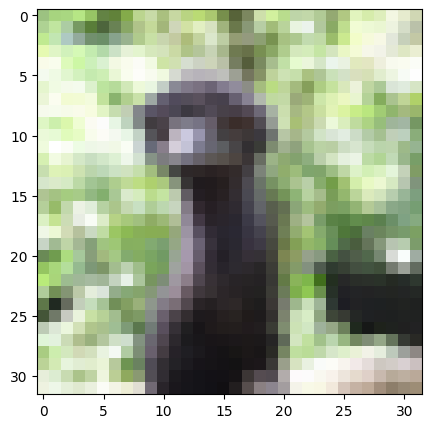

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[55])

In [5]:
x_train_final = x_train.reshape(-1,32*32*3)/255
x_test_final = x_test.reshape(-1,32*32*3)/255

In [6]:
print(x_train_final.shape)
print(x_test_final.shape)
#Expected Output :
# (50000,3072)
# (10000,3072)

(50000, 3072)
(10000, 3072)


In [7]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [9]:
model = Sequential()
model.add(Input(shape=(32*32*3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,371,594
Trainable params: 2,371,594
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train_final,y_train_cat,batch_size=128,epochs=30,validation_data=(x_test_final,y_test_cat))

Epoch 1/30
391/391 [==============================] - 9s 6ms/step - loss: 1.8514 - accuracy: 0.3272 - val_loss: 1.7816 - val_accuracy: 0.3525
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6503 - accuracy: 0.4074 - val_loss: 1.5948 - val_accuracy: 0.4278
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 1.5578 - accuracy: 0.4433 - val_loss: 1.5230 - val_accuracy: 0.4549
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 1.4963 - accuracy: 0.4650 - val_loss: 1.4963 - val_accuracy: 0.4643
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 1.4477 - accuracy: 0.4835 - val_loss: 1.4894 - val_accuracy: 0.4667
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 1.4134 - accuracy: 0.4955 - val_loss: 1.4302 - val_accuracy: 0.4903
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 1.3713 - accuracy: 0.5078 - val_loss: 1.4154 - val_accuracy: 0.4984
Epoch 

In [13]:
x_train_final = x_train/255
x_test_final = x_test/255

In [14]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                      

In [18]:
model.fit(x_train_final,y_train_cat,batch_size=128,epochs=30,validation_data=(x_test_final,y_test_cat))

Epoch 1/30
391/391 [==============================] - 13s 13ms/step - loss: 1.5899 - accuracy: 0.4229 - val_loss: 1.3705 - val_accuracy: 0.5032
Epoch 2/30
391/391 [==============================] - 4s 9ms/step - loss: 1.2290 - accuracy: 0.5616 - val_loss: 1.1778 - val_accuracy: 0.5886
Epoch 3/30
391/391 [==============================] - 4s 10ms/step - loss: 1.0376 - accuracy: 0.6339 - val_loss: 1.0261 - val_accuracy: 0.6416
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9292 - accuracy: 0.6744 - val_loss: 0.9999 - val_accuracy: 0.6496
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 0.8526 - accuracy: 0.7015 - val_loss: 0.9644 - val_accuracy: 0.6648
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 0.7944 - accuracy: 0.7232 - val_loss: 0.9677 - val_accuracy: 0.6661
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 0.7408 - accuracy: 0.7406 - val_loss: 0.9593 - val_accuracy: 0.6694

we can see the clear diffrent between ANN and CNN between loss and accuracy but the cnn have overfitting problem we can fix this in under cell

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3), padding = 'same', kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' ,padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same' ,kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu' , padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer= 'he_uniform'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu',padding = 'same',kernel_initializer= 'he_uniform'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax',kernel_initializer= 'he_uniform'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.count_params())
batch_size = 128
epochs = 30

print('Num Params : ', model.count_params())
model.fit(x_train_final, y_train_cat,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test_final, y_test_cat))

550570
Num Params :  550570
Epoch 1/30
391/391 [==============================] - 24s 20ms/step - loss: 1.7302 - accuracy: 0.3637 - val_loss: 1.4618 - val_accuracy: 0.4651
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 1.2754 - accuracy: 0.5398 - val_loss: 1.1130 - val_accuracy: 0.6057
Epoch 3/30
391/391 [==============================] - 7s 17ms/step - loss: 1.0513 - accuracy: 0.6277 - val_loss: 0.9434 - val_accuracy: 0.6682
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 0.8899 - accuracy: 0.6844 - val_loss: 0.8688 - val_accuracy: 0.6980
Epoch 5/30
391/391 [==============================] - 7s 19ms/step - loss: 0.7800 - accuracy: 0.7273 - val_loss: 0.7301 - val_accuracy: 0.7483
Epoch 6/30
391/391 [==============================] - 7s 18ms/step - loss: 0.6961 - accuracy: 0.7571 - val_loss: 0.7185 - val_accuracy: 0.7531
Epoch 7/30
391/391 [==============================] - 8s 19ms/step - loss: 0.6370 - accuracy: 0.7767 - val_loss: 